In [1]:
import pandas as pd
import numpy as np
import glob
import re

In [2]:
import matplotlib.pyplot as plt
import seaborn as sb

## Standardization *Month files

In [3]:
all_files = glob.glob("data_preprocessing/gov/*Month.csv")
all_files

['data_preprocessing/gov\\Average air humidity Month.csv',
 'data_preprocessing/gov\\Average air temperature Month.csv',
 'data_preprocessing/gov\\Mean sea level Month.csv',
 'data_preprocessing/gov\\Total rainfall Month.csv',
 'data_preprocessing/gov\\Total sunshine hours Month.csv']

In [4]:
def fillData_Month(df_test):
    year_save = 0
    list_years = []
    list_not_null = []
    # -----------
    for index in range(0, df_test.shape[0]):
        row = df_test.iloc[index, :]
        isnull = row.isnull().any()
        if(isnull):
            year_save = df_test.iloc[index, 0]
        list_years.append(year_save)
        list_not_null.append(~isnull)
    df_test['Year'] = list_years
    df_test = df_test.rename({'Unnamed: 0': 'Name'}, axis=1)
    df_test = df_test[list_not_null]
    # -----------
    string_ints = [str(i) for i in np.arange(1, 13, 1).tolist()]
    df_test = pd.melt(df_test, id_vars=['Name', 'Year'], value_vars=string_ints, var_name='Month')
    return df_test

for file in all_files:
    df = fillData_Month(
        pd.read_csv(file)
    )
    df.to_csv(file, index=False)

In [5]:
df = pd.read_csv(all_files[1])
df.head()

,Name,Year,Month,value
0,Lai Châu,2019,1,"14,8"
1,Sơn La,2019,1,"16,5"
2,Tuyên Quang,2019,1,"17,8"
3,Hà Nội,2019,1,"18,0"
4,Bãi Cháy,2019,1,"17,5"


## Standardization *Year files

In [6]:
all_files = glob.glob("data_preprocessing/gov/*Year.csv")
all_files

['data_preprocessing/gov\\Average air humidity Year.csv',
 'data_preprocessing/gov\\Average air temperature Year.csv',
 'data_preprocessing/gov\\Mean sea level Year.csv',
 'data_preprocessing/gov\\Total rainfall Year.csv',
 'data_preprocessing/gov\\Total sunshine hours Year.csv']

In [7]:
def fillData_Year(df_test):
    df_test = df_test.rename({'Unnamed: 0': 'Name'}, axis=1)
    string_ints = df_test.columns[1:]
    df_test = pd.melt(df_test, id_vars=['Name'], value_vars=string_ints, var_name='Year')
    return df_test

for file in all_files:
    df = fillData_Year(
        pd.read_csv(file)
    )
    df.to_csv(file, index=False)

In [8]:
df = pd.read_csv(all_files[1])
df.head(5)

,Name,Year,value
0,Lai Châu,2006,"23,3"
1,Sơn La,2006,"21,8"
2,Tuyên Quang,2006,"24,0"
3,Hà Nội,2006,"24,7"
4,Bãi Cháy,2006,"23,9"


## Preprocessing

In [9]:
from lib_analytics import *

In [10]:
all_files = glob.glob("data_preprocessing/gov/*.csv")
all_files

['data_preprocessing/gov\\Average air humidity Month.csv',
 'data_preprocessing/gov\\Average air humidity Year.csv',
 'data_preprocessing/gov\\Average air temperature Month.csv',
 'data_preprocessing/gov\\Average air temperature Year.csv',
 'data_preprocessing/gov\\Mean sea level Month.csv',
 'data_preprocessing/gov\\Mean sea level Year.csv',
 'data_preprocessing/gov\\Total rainfall Month.csv',
 'data_preprocessing/gov\\Total rainfall Year.csv',
 'data_preprocessing/gov\\Total sunshine hours Month.csv',
 'data_preprocessing/gov\\Total sunshine hours Year.csv']

In [11]:
bold_string = '\033[1m{}\033[0;0m'
for file in all_files:
    print('\n', bold_string.format(file), '\n')
    showComponentOfColumn(pd.read_csv(file))
    print('='*30)


 data_preprocessing/gov\Average air humidity Month.csv 

Name  -  ['Bãi Cháy', 'Cà Mau', 'Huế', 'Hà Nội', 'Lai Châu', 'Nam Định', 'Nha Trang', 'Pleiku', 'Qui Nhơn', 'Sơn La', 'Tuyên Quang', 'Vinh', 'Vũng Tàu', 'Đà Lạt', 'Đà Nẵng']
 
Year  -  [2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
 
Month  -  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
 
value  -  [60.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 98.0, 99.0]
 

 data_preprocessing/gov\Average air humidity Year.csv 

Name  -  ['Bãi Cháy', 'Cà Mau', 'Huế', 'Hà Nội', 'Lai Châu', 'Nam Định', 'Nha Trang', 'Pleiku', 'Qui Nhơn', 'Sơn La', 'Tuyên Quang', 'Vinh', 'Vũng Tàu', 'Đà Lạt', 'Đà Nẵng']
 
Year  -  [2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]
 
value  -  ['75,2', '76,4', '76,8', '76,9', '77,0

value  -  ['0,0', '0,1', '0,7', '1,0', '1,3', '10,7', '10,8', '100,0', '100,3', '100,9', '101,0', '101,3', '101,6', '101,7', '102,0', '102,3', '102,4', '102,5', '102,6', '102,7', '102,9', '103,0', '103,2', '103,3', '103,4', '103,5', '103,6', '103,8', '103,9', '104,0', '104,1', '104,2', '104,3', '104,4', '104,5', '104,6', '104,7', '104,9', '105,0', '105,1', '105,2', '105,5', '105,6', '105,7', '105,8', '106,0', '106,3', '106,5', '106,9', '107,0', '107,2', '107,3', '107,4', '107,6', '107,7', '107,8', '108,0', '108,1', '108,2', '108,4', '108,6', '108,8', '108,9', '109,0', '109,1', '109,2', '109,3', '109,4', '109,8', '109,9', '11,5', '110,0', '110,2', '110,3', '110,4', '110,7', '110,8', '111,0', '111,2', '111,3', '111,4', '111,6', '111,7', '111,9', '112,0', '112,3', '112,4', '112,5', '112,6', '112,7', '112,9', '113,0', '113,6', '113,8', '114,0', '114,3', '114,5', '114,6', '114,9', '115,0', '115,1', '115,3', '115,4', '115,5', '115,6', '115,9', '116,0', '116,1', '116,4', '116,5', '116,6', '11

Ghi chú: 
<blockquote>
    data_preprocessing/gov\Average air temperature Month.csv cột value có '..'  <br>
    data_preprocessing/gov\Mean sea level Month.csv          cột value có '...' <br>
    data_preprocessing/gov\Mean sea level Year.csv           cột value có '...' <br>
    data_preprocessing/gov\Total rainfall Month.csv          cột value có '...' <br>
    các cột value chuyển đổi từ string to số thực.
</blockquote>

### Format Number

In [12]:
def convertStringToFloat(text):
    if(text.count('.') > 1):
        return text
    if(text.find('.') > 0):
        if(text.find(',') > 0):
            return float(text.replace('.', '').replace(',', '.'))
        else:
            return float(text)
    else:
        return float(text.replace(',', '.'))

#### Average air humidity Month.csv

In [13]:
all_files[0]

'data_preprocessing/gov\\Average air humidity Month.csv'

In [14]:
df = pd.read_csv(all_files[0], index_col=0)
df.head(2)

,Year,Month,value
Name,,,
Lai Châu,2019,1,88.0
Sơn La,2019,1,80.0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3240 entries, Lai Châu to Cà Mau
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    3240 non-null   int64  
 1   Month   3240 non-null   int64  
 2   value   3240 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 101.2+ KB


file 'Average air humidity Month' cột value là float, nên không cần convert dữ liệu

In [16]:
print(df.value.values)

[88. 80. 84. ... 83. 79. 81.]


#### Average air humidity Year.csv

In [17]:
all_files[1]

'data_preprocessing/gov\\Average air humidity Year.csv'

In [18]:
df = pd.read_csv(all_files[1], index_col=0)
df.head(2)

,Year,value
Name,,
Lai Châu,2006,"78,0"
Sơn La,2006,"80,0"


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, Lai Châu to Cà Mau
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Year    150 non-null    int64 
 1   value   150 non-null    object
dtypes: int64(1), object(1)
memory usage: 3.5+ KB


file 'Average air humidity Month' cột value là object, nên cần convert dữ liệu

In [20]:
print('Dữ liệu khi chưa convert:')
print(df.value.values)

Dữ liệu khi chưa convert:
['78,0' '80,0' '83,0' '78,0' '82,0' '83,0' '83,0' '85,0' '81,0' '77,0'
 '83,0' '87,0' '78,0' '77,0' '83,0' '81,0' '80,0' '82,0' '78,0' '80,0'
 '82,0' '82,0' '87,0' '82,0' '79,0' '83,0' '86,0' '80,0' '78,0' '83,0'
 '83,8' '82,8' '82,2' '79,3' '80,8' '83,6' '81,9' '87,6' '82,0' '78,7'
 '83,5' '86,8' '80,3' '77,8' '83,2' '80,1' '77,9' '80,3' '76,9' '81,0'
 '82,9' '81,3' '87,2' '81,0' '77,7' '83,2' '85,8' '79,9' '79,6' '82,3'
 '79,2' '78,3' '79,5' '77,7' '82,3' '83,0' '81,7' '87,1' '82,4' '80,8'
 '83,0' '85,8' '79,2' '81,8' '84,0' '82,3' '81,2' '81,9' '77,3' '82,1'
 '81,1' '83,0' '87,8' '80,8' '76,4' '82,0' '84,3' '77,6' '79,1' '79,5'
 '83,2' '80,2' '82,1' '78,5' '84,2' '84,7' '82,3' '85,0' '79,9' '75,2'
 '80,8' '83,8' '78,5' '78,2' '81,3' '83,0' '80,0' '81,0' '78,0' '83,0'
 '84,0' '84,0' '87,0' '81,0' '79,0' '80,0' '84,0' '78,0' '78,0' '81,0'
 '79,6' '79,8' '81,7' '78,5' '81,9' '83,6' '83,3' '85,4' '80,6' '77,5'
 '80,2' '85,8' '76,9' '77,6' '81,0' '80,5' '78,7' '

In [21]:
df['value'] = [ convertStringToFloat(x) for x in df.value.values ]
print('Dữ liệu sau khi convert:')
print(df.value.values)

Dữ liệu sau khi convert:
[78.  80.  83.  78.  82.  83.  83.  85.  81.  77.  83.  87.  78.  77.
 83.  81.  80.  82.  78.  80.  82.  82.  87.  82.  79.  83.  86.  80.
 78.  83.  83.8 82.8 82.2 79.3 80.8 83.6 81.9 87.6 82.  78.7 83.5 86.8
 80.3 77.8 83.2 80.1 77.9 80.3 76.9 81.  82.9 81.3 87.2 81.  77.7 83.2
 85.8 79.9 79.6 82.3 79.2 78.3 79.5 77.7 82.3 83.  81.7 87.1 82.4 80.8
 83.  85.8 79.2 81.8 84.  82.3 81.2 81.9 77.3 82.1 81.1 83.  87.8 80.8
 76.4 82.  84.3 77.6 79.1 79.5 83.2 80.2 82.1 78.5 84.2 84.7 82.3 85.
 79.9 75.2 80.8 83.8 78.5 78.2 81.3 83.  80.  81.  78.  83.  84.  84.
 87.  81.  79.  80.  84.  78.  78.  81.  79.6 79.8 81.7 78.5 81.9 83.6
 83.3 85.4 80.6 77.5 80.2 85.8 76.9 77.6 81.  80.5 78.7 80.3 78.3 82.8
 82.2 81.8 85.4 80.7 80.  80.1 84.  77.  76.8 80. ]


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, Lai Châu to Cà Mau
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    150 non-null    int64  
 1   value   150 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 3.5+ KB


In [23]:
df.to_csv(all_files[1])

#### Average air temperature Month.csv

In [24]:
all_files[2]

'data_preprocessing/gov\\Average air temperature Month.csv'

In [25]:
df = pd.read_csv(all_files[2], index_col=0)
df.head(2)

,Year,Month,value
Name,,,
Lai Châu,2019,1,"14,8"
Sơn La,2019,1,"16,5"


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2520 entries, Lai Châu to Cà Mau
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Year    2520 non-null   int64 
 1   Month   2520 non-null   int64 
 2   value   2520 non-null   object
dtypes: int64(2), object(1)
memory usage: 78.8+ KB


file 'Average air temperature Month' cột value là object, nên cần convert dữ liệu

In [27]:
print('Dữ liệu khi chưa convert:')
print(df.value.values)

Dữ liệu khi chưa convert:
['14,8' '16,5' '17,8' ... '25,2' '27,3' '26,8']


In [28]:
df['value'] = [ convertStringToFloat(x) for x in df.value.values ]
print('Dữ liệu sau khi convert:')
print(df.value.values)

Dữ liệu sau khi convert:
[14.8 16.5 17.8 ... 25.2 27.3 26.8]


In [29]:
df.to_csv(all_files[2])

#### Average air temperature Year.csv

In [30]:
all_files[3]

'data_preprocessing/gov\\Average air temperature Year.csv'

In [31]:
df = pd.read_csv(all_files[3], index_col=0)
df.head(2)

,Year,value
Name,,
Lai Châu,2006,"23,3"
Sơn La,2006,"21,8"


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 210 entries, Lai Châu to Cà Mau
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Year    210 non-null    int64 
 1   value   210 non-null    object
dtypes: int64(1), object(1)
memory usage: 4.9+ KB


file 'Average air temperature Year' cột value là object, nên cần convert dữ liệu

In [33]:
print('Dữ liệu khi chưa convert:')
print(df.value.values)

Dữ liệu khi chưa convert:
['23,3' '21,8' '24,0' '24,7' '23,9' '24,4' '25,1' '25,4' '26,3' '27,4'
 '22,3' '18,3' '27,2' '28,0' '27,6' '23,2' '21,5' '24,0' '24,6' '23,8'
 '24,2' '24,9' '25,0' '26,2' '27,0' '22,2' '18,1' '26,7' '27,8' '27,5'
 '23,0' '20,7' '23,2' '23,7' '23,1' '23,3' '24,1' '24,2' '25,5' '26,8'
 '21,8' '18,0' '26,6' '27,7' '27,2' '23,8' '21,9' '24,2' '24,9' '24,0'
 '24,4' '25,0' '25,0' '26,3' '27,2' '22,0' '18,2' '27,0' '27,7' '27,5'
 '24,0' '22,1' '24,2' '24,9' '24,0' '24,6' '25,3' '25,4' '26,3' '27,4'
 '22,0' '18,2' '27,4' '27,7' '27,5' '23,6' '20,6' '22,8' '23,3' '22,6'
 '22,9' '23,3' '23,8' '25,2' '26,9' '21,6' '18,1' '26,7' '27,5' '27,5'
 '20,2' '21,9' '23,8' '24,3' '23,5' '24,0' '24,8' '25,3' '26,5' '27,7'
 '22,5' '18,5' '27,5' '28,0' '27,7' '19,9' '21,4' '23,8' '24,4' '23,5'
 '23,8' '24,5' '25,0' '26,2' '27,2' '22,4' '18,4' '27,2' '28,0' '27,8'
 '20,1' '21,8' '24,0' '24,6' '23,7' '24,2' '24,8' '25,3' '26,3' '27,2'
 '22,4' '18,2' '27,1' '27,9' '27,7' '20,6' '22,3' '

In [34]:
df['value'] = [ convertStringToFloat(x) for x in df.value.values ]
print('Dữ liệu sau khi convert:')
print(df.value.values)

Dữ liệu sau khi convert:
[23.3 21.8 24.  24.7 23.9 24.4 25.1 25.4 26.3 27.4 22.3 18.3 27.2 28.
 27.6 23.2 21.5 24.  24.6 23.8 24.2 24.9 25.  26.2 27.  22.2 18.1 26.7
 27.8 27.5 23.  20.7 23.2 23.7 23.1 23.3 24.1 24.2 25.5 26.8 21.8 18.
 26.6 27.7 27.2 23.8 21.9 24.2 24.9 24.  24.4 25.  25.  26.3 27.2 22.
 18.2 27.  27.7 27.5 24.  22.1 24.2 24.9 24.  24.6 25.3 25.4 26.3 27.4
 22.  18.2 27.4 27.7 27.5 23.6 20.6 22.8 23.3 22.6 22.9 23.3 23.8 25.2
 26.9 21.6 18.1 26.7 27.5 27.5 20.2 21.9 23.8 24.3 23.5 24.  24.8 25.3
 26.5 27.7 22.5 18.5 27.5 28.  27.7 19.9 21.4 23.8 24.4 23.5 23.8 24.5
 25.  26.2 27.2 22.4 18.4 27.2 28.  27.8 20.1 21.8 24.  24.6 23.7 24.2
 24.8 25.3 26.3 27.2 22.4 18.2 27.1 27.9 27.7 20.6 22.3 24.8 25.3 24.4
 25.  25.5 25.7 26.7 27.5 22.9 18.5 27.4 28.1 28.  20.2 21.9 24.4 25.2
 24.  24.6 24.9 25.4 26.6 27.4 23.3 19.  27.5 28.3 28.2 19.7 21.7 24.2
 25.1 24.  24.4 24.9 25.1 26.5 27.4 22.8 18.7 27.4 28.  27.9 20.  21.6
 24.4 25.1 24.  24.5 24.9 25.1 26.5 27.6 22.6 18.4 27.4

In [35]:
df.to_csv(all_files[3])

#### Mean sea level Month.csv

In [36]:
all_files[4]

'data_preprocessing/gov\\Mean sea level Month.csv'

In [37]:
df = pd.read_csv(all_files[4], index_col=0)
df.head(2)

,Year,Month,value
Name,,,
Cô Tô,2019,1,209
Cửa Ông,2019,1,253


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1152 entries, Cô Tô to Phú Quốc
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Year    1152 non-null   int64 
 1   Month   1152 non-null   int64 
 2   value   1152 non-null   object
dtypes: int64(2), object(1)
memory usage: 36.0+ KB


file 'Mean sea level Month' cột value là object, nên cần convert dữ liệu

In [39]:
print('Dữ liệu khi chưa convert:')
print(df.value.values)

Dữ liệu khi chưa convert:
['209' '253' '214' ... '277' '110' '115']


In [40]:
df['value'] = [ convertStringToFloat(x) for x in df.value.values ]
print('Dữ liệu sau khi convert:')
print(df.value.values)

Dữ liệu sau khi convert:
[209.0 253.0 214.0 ... 277.0 110.0 115.0]


In [41]:
df.to_csv(all_files[4])

#### Mean sea level Year.csv

In [42]:
all_files[5]

'data_preprocessing/gov\\Mean sea level Year.csv'

In [43]:
df = pd.read_csv(all_files[5], index_col=0)
df.head(2)

,Year,value
Name,,
Cô Tô,2013,198
Cửa Ông,2013,248


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112 entries, Cô Tô to Phú Quốc
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Year    112 non-null    int64 
 1   value   112 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.6+ KB


file 'Mean sea level Year' cột value là object, nên cần convert dữ liệu

In [45]:
print('Dữ liệu khi chưa convert:')
print(df.value.values)

Dữ liệu khi chưa convert:
['198' '248' '216' '200' '153' '195' '157' '82' '101' '162' '224' '242'
 '272' '256' '89' '115' '199' '249' '213' '199' '153' '194' '168' '77'
 '98' '157' '222' '241' '266' '254' '85' '94' '206' '249' '213' '199'
 '150' '193' '168' '77' '95' '153' '219' '237' '264' '252' '81' '94' '209'
 '252' '215' '202' '154' '193' '172' '81' '102' '158' '221' '239' '270'
 '...' '...' '...' '213' '256' '219' '206' '155' '197' '168' '70' '96'
 '162' '225' '239' '275' '256' '86' '100' '210' '253' '215' '202' '152'
 '196' '165' '78' '101' '158' '222' '242' '271' '255' '84' '97' '213'
 '255' '217' '204' '153' '196' '162' '81' '101' '158' '224' '241' '254'
 '254' '83' '98']


In [46]:
df['value'] = [ convertStringToFloat(x) for x in df.value.values ]
print('Dữ liệu sau khi convert:')
print(df.value.values)

Dữ liệu sau khi convert:
[198.0 248.0 216.0 200.0 153.0 195.0 157.0 82.0 101.0 162.0 224.0 242.0
 272.0 256.0 89.0 115.0 199.0 249.0 213.0 199.0 153.0 194.0 168.0 77.0
 98.0 157.0 222.0 241.0 266.0 254.0 85.0 94.0 206.0 249.0 213.0 199.0
 150.0 193.0 168.0 77.0 95.0 153.0 219.0 237.0 264.0 252.0 81.0 94.0 209.0
 252.0 215.0 202.0 154.0 193.0 172.0 81.0 102.0 158.0 221.0 239.0 270.0
 '...' '...' '...' 213.0 256.0 219.0 206.0 155.0 197.0 168.0 70.0 96.0
 162.0 225.0 239.0 275.0 256.0 86.0 100.0 210.0 253.0 215.0 202.0 152.0
 196.0 165.0 78.0 101.0 158.0 222.0 242.0 271.0 255.0 84.0 97.0 213.0
 255.0 217.0 204.0 153.0 196.0 162.0 81.0 101.0 158.0 224.0 241.0 254.0
 254.0 83.0 98.0]


In [47]:
df.to_csv(all_files[5])

#### Total rainfall Month.csv

In [48]:
all_files[6]

'data_preprocessing/gov\\Total rainfall Month.csv'

In [49]:
df = pd.read_csv(all_files[6], index_col=0)
df.head(2)

,Year,Month,value
Name,,,
Lai Châu,2019,1,"144,9"
Sơn La,2019,1,"58,7"


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2520 entries, Lai Châu to Cà Mau
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Year    2520 non-null   int64 
 1   Month   2520 non-null   int64 
 2   value   2520 non-null   object
dtypes: int64(2), object(1)
memory usage: 78.8+ KB


file 'Total rainfall Month' cột value là object, nên cần convert dữ liệu.

In [51]:
print('Dữ liệu khi chưa convert:')
print(df.value.values)

Dữ liệu khi chưa convert:
['144,9' '58,7' '54,7' ... '98,0' '120,0' '27,0']


In [52]:
df['value'] = [ convertStringToFloat(x) for x in df.value.values ]
print('Dữ liệu sau khi convert:')
print(df.value.values)

Dữ liệu sau khi convert:
[144.9 58.7 54.7 ... 98.0 120.0 27.0]


In [53]:
df.to_csv(all_files[6])

#### Total rainfall Year.csv

In [54]:
all_files[7]

'data_preprocessing/gov\\Total rainfall Year.csv'

In [55]:
df = pd.read_csv(all_files[7], index_col=0)
df.head(2)

,Year,value
Name,,
Lai Châu,2006,"1.727,0"
Sơn La,2006,"1.212,0"


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 210 entries, Lai Châu to Cà Mau
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Year    210 non-null    int64 
 1   value   210 non-null    object
dtypes: int64(1), object(1)
memory usage: 4.9+ KB


file 'Total rainfall Year' cột value là object, nên cần convert dữ liệu.

In [57]:
print('Dữ liệu khi chưa convert:')
print(df.value.values)

Dữ liệu khi chưa convert:
['1.727,0' '1.212,0' '1.596,0' '1.240,0' '1.697,0' '1.114,0' '1.951,0'
 '2.479,0' '2.233,0' '1.291,0' '2.178,0' '1.698,0' '819,0' '1.514,0'
 '2.387,0' '2.476,0' '1.353,0' '1.294,0' '1.659,0' '1.432,0' '1.087,0'
 '1.962,0' '4.393,0' '3.063,0' '2.241,0' '2.314,0' '2.156,0' '1.565,0'
 '1.522,0' '2.606,0' '2.628,0' '2.083,0' '1.721,0' '2.268,0' '1.971,0'
 '1.800,0' '2.120,0' '3.850,0' '2.528,0' '2.337,0' '1.645,0' '1.577,0'
 '2.301,0' '1.390,0' '2.679,0' '1.975,9' '1.002,4' '1.284,3' '1.612,1'
 '1.567,3' '1.643,6' '1.409,2' '3.809,1' '3.017,8' '2.273,6' '2.725,4'
 '1.849,1' '1.392,5' '1.162,7' '2.244,4' '1.857,8' '1.209,8' '1.284,3'
 '1.239,2' '1.842,0' '1.461,4' '2.716,5' '2.854,0' '2.236,8' '2.684,9'
 '2.725,4' '1.849,1' '2.657,9' '1.162,7' '2.244,4' '2.017,7' '1.093,4'
 '1.449,5' '1.795,2' '1.823,8' '1.767,2' '2.258,6' '4.481,0' '3.647,8'
 '1.524,9' '2.567,2' '1.650,0' '1.327,6' '1.382,9' '2.445,9' '2.618,7'
 '1.480,0' '1.995,3' '1.801,2' '2.142,0' '1.772,8' '1

In [58]:
df['value'] = [ convertStringToFloat(x) for x in df.value.values ]
print('Dữ liệu sau khi convert:')
print(df.value.values)

Dữ liệu sau khi convert:
[1727.  1212.  1596.  1240.  1697.  1114.  1951.  2479.  2233.  1291.
 2178.  1698.   819.  1514.  2387.  2476.  1353.  1294.  1659.  1432.
 1087.  1962.  4393.  3063.  2241.  2314.  2156.  1565.  1522.  2606.
 2628.  2083.  1721.  2268.  1971.  1800.  2120.  3850.  2528.  2337.
 1645.  1577.  2301.  1390.  2679.  1975.9 1002.4 1284.3 1612.1 1567.3
 1643.6 1409.2 3809.1 3017.8 2273.6 2725.4 1849.1 1392.5 1162.7 2244.4
 1857.8 1209.8 1284.3 1239.2 1842.  1461.4 2716.5 2854.  2236.8 2684.9
 2725.4 1849.1 2657.9 1162.7 2244.4 2017.7 1093.4 1449.5 1795.2 1823.8
 1767.2 2258.6 4481.  3647.8 1524.9 2567.2 1650.  1327.6 1382.9 2445.9
 2618.7 1480.  1995.3 1801.2 2142.  1772.8 1892.5 2370.  1696.1 1483.
 2207.5 1859.5 1681.7 1215.6 2153.9 2656.6 1540.  1648.7 1934.7 2724.1
 1757.3 2499.3 2725.7 2316.7 1904.9 2243.8 1935.4 1365.4 1366.6 1941.3
 2267.2 1414.6 1499.2 1660.6 1922.  1721.4 1466.5 2309.5 2224.1 1627.9
 2457.7 2079.   972.2 1377.4 2065.7 2295.1 1803.4 2173.7 

In [59]:
df.to_csv(all_files[7])

#### Total sunshine hours Month.csv

In [60]:
all_files[8]

'data_preprocessing/gov\\Total sunshine hours Month.csv'

In [61]:
df = pd.read_csv(all_files[8], index_col=0)
df.head(2)

,Year,Month,value
Name,,,
Lai Châu,2019,1,"131,5"
Sơn La,2019,1,"103,3"


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2520 entries, Lai Châu to Cà Mau
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Year    2520 non-null   int64 
 1   Month   2520 non-null   int64 
 2   value   2520 non-null   object
dtypes: int64(2), object(1)
memory usage: 78.8+ KB


file 'Total sunshine hours Month' cột value là object, nên cần convert dữ liệu.

In [63]:
print('Dữ liệu khi chưa convert:')
print(df.value.values)

Dữ liệu khi chưa convert:
['131,5' '103,3' '25,4' ... '166,0' '202,0' '176,0']


In [64]:
df['value'] = [ convertStringToFloat(x) for x in df.value.values ]
print('Dữ liệu sau khi convert:')
print(df.value.values)

Dữ liệu sau khi convert:
[131.5 103.3  25.4 ... 166.  202.  176. ]


In [65]:
df.to_csv(all_files[8])

#### Total sunshine hours Year.csv

In [66]:
all_files[9]

'data_preprocessing/gov\\Total sunshine hours Year.csv'

In [67]:
df = pd.read_csv(all_files[9])
df.head(2)

,Name,Year,value
0,Lai Châu,2006,"1.884,0"
1,Sơn La,2006,"2.063,0"


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    210 non-null    object
 1   Year    210 non-null    int64 
 2   value   210 non-null    object
dtypes: int64(1), object(2)
memory usage: 5.0+ KB


In [69]:
print('Dữ liệu khi chưa convert:')
print(df.value.values)

Dữ liệu khi chưa convert:
['1.884,0' '2.063,0' '1.421,0' '1.363,0' '1.457,0' '1.418,0' '1.558,0'
 '1.899,0' '2.193,0' '2.401,0' '2.455,0' '2.213,0' '2.712,0' '2.613,0'
 '2.175,0' '1.600,0' '2.083,0' '1.472,0' '1.462,0' '1.409,0' '1.396,0'
 '1.564,0' '1.659,0' '2.002,0' '2.411,0' '2.248,0' '1.950,0' '2.502,0'
 '2.349,0' '1.965,0' '1.645,0' '1.831,0' '1.358,0' '1.234,0' '1.338,0'
 '1.215,0' '1.314,0' '1.546,0' '1.860,0' '2.289,0' '2.349,0' '1.920,0'
 '2.407,0' '2.509,0' '1.939,0' '2.049,9' '2.208,1' '1.578,0' '1.413,0'
 '1.602,2' '1.454,3' '1.523,8' '1.860,2' '2.112,8' '2.426,0' '2.329,6'
 '2.029,1' '2.493,1' '2.575,9' '1.914,3' '1.913,8' '2.163,2' '1.578,0'
 '1.256,0' '1.285,6' '1.305,0' '1.484,0' '1.973,8' '1.434,0' '2.528,6'
 '2.323,6' '2.029,1' '2.527,3' '2.575,9' '1.914,3' '1.664,1' '1.782,8'
 '1.389,6' '1.063,6' '1.430,8' '1.164,6' '1.188,2' '1.497,5' '1.781,6'
 '2.178,7' '2.214,9' '1.912,8' '2.374,3' '2.435,3' '1.892,9' '1.846,5'
 '2.068,3' '1.372,5' '909,7' '1.147,0' '1.153,4' '1

In [70]:
df['value'] = [ convertStringToFloat(x) for x in df.value.values ]
print('Dữ liệu sau khi convert:')
print(df.value.values)

Dữ liệu sau khi convert:
[1884.  2063.  1421.  1363.  1457.  1418.  1558.  1899.  2193.  2401.
 2455.  2213.  2712.  2613.  2175.  1600.  2083.  1472.  1462.  1409.
 1396.  1564.  1659.  2002.  2411.  2248.  1950.  2502.  2349.  1965.
 1645.  1831.  1358.  1234.  1338.  1215.  1314.  1546.  1860.  2289.
 2349.  1920.  2407.  2509.  1939.  2049.9 2208.1 1578.  1413.  1602.2
 1454.3 1523.8 1860.2 2112.8 2426.  2329.6 2029.1 2493.1 2575.9 1914.3
 1913.8 2163.2 1578.  1256.  1285.6 1305.  1484.  1973.8 1434.  2528.6
 2323.6 2029.1 2527.3 2575.9 1914.3 1664.1 1782.8 1389.6 1063.6 1430.8
 1164.6 1188.2 1497.5 1781.6 2178.7 2214.9 1912.8 2374.3 2435.3 1892.9
 1846.5 2068.3 1372.5  909.7 1147.  1153.4 1460.6 1865.9 2101.3 2567.5
 2469.8 2111.4 2688.1 2661.5 2071.9 1964.8 2026.5 1571.5 1227.8 1278.7
 1219.6 1372.9 1765.9 1975.5 2340.9 2310.2 2019.9 2498.  2328.3 1987.
 1951.  2155.1 1458.3 1168.  1396.4 1258.  1502.4 2025.1 2208.6 2638.1
 2548.7 2117.9 2705.8 2693.8 2195.8 2023.6 2251.9 1684.4 

In [71]:
df.to_csv(all_files[9])

### Handle character ...

#### Average air temperature Month.csv

In [72]:
df = pd.read_csv('data_preprocessing/gov\Average air temperature Month.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2520 entries, 0 to 2519
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    2520 non-null   object
 1   Year    2520 non-null   int64 
 2   Month   2520 non-null   int64 
 3   value   2520 non-null   object
dtypes: int64(2), object(2)
memory usage: 78.9+ KB


In [73]:
print('Dữ liệu có {} dòng'.format(df.shape[0]))
print('Dữ liệu có ký tự .. chiếm {} dòng'.format(df[df.value == '..'].shape[0]))

Dữ liệu có 2520 dòng
Dữ liệu có ký tự .. chiếm 1 dòng


In [74]:
print('Dòng có ký tự .. là ')
display(df[df.value == '..'])

Dòng có ký tự .. là 


,Name,Year,Month,value
330,Lai Châu,2011,2,..


C:\Users\PC\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\PC\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


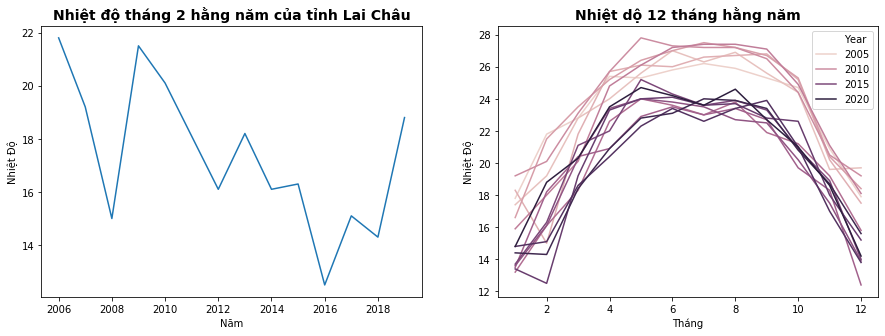

In [75]:
df_show_1 = df[(df.Name == 'Lai Châu') & (df.Month == 2) & (df.value != '..')]
df_show_1['value'] = [ float(x) for x in df_show_1['value'].values ]
# ----------
df_show_2 = df[(df.Name == 'Lai Châu') & (df.value != '..')]
df_show_2['value'] = [ float(x) for x in df_show_2['value'].values ]
# ----------
plt.figure(figsize=(15,5))
# ----------
plt.subplot(1,2,1)
plt.plot(
    df_show_1.Year,
    df_show_1.value
)
plt.xlabel('Năm')
plt.ylabel('Nhiệt Độ')
plt.title('Nhiệt độ tháng 2 hằng năm của tỉnh Lai Châu' ,fontweight='bold', fontsize=14)    
# ----------
plt.subplot(1,2,2)
sb.lineplot(
    data = df_show_2,
    x = 'Month',
    y = 'value',
    hue = 'Year'
)
plt.xlabel('Tháng')
plt.ylabel('Nhiệt Độ')
plt.title('Nhiệt dộ 12 tháng hằng năm' ,fontweight='bold', fontsize=14) 
# ----------
plt.show()

Mặc dù nhiệt độ không khí trung bình tháng 2 hằng năm của tỉnh Lai Châu có biến động bất thường. <br>
Nhưng nhiệt độ không khí trung bình 12 tháng hằng năm của Lai Châu lại theo Parabol dốc xuống với nhiệt độ cao ở giữa năm, và thấp xuống vào đầu và cuối năm. <br>
Nên ký tự '..' sẽ được thay thế bằng nhiệt độ của 2 tháng trước và sau trong năm 2011.

In [76]:
def findRow(month):
    return (df.Name == 'Lai Châu') & (df.Month == month) & (df.Year == 2011)

def getValue(df):
    return float(df['value'].values)
    
before = df[findRow(1)]
after = df[findRow(3)]
df.loc[findRow(2), 'value'] = (getValue(before) + getValue(after)) / 2

display(
    before,
    after,
    df[findRow(2)]
)

,Name,Year,Month,value
120,Lai Châu,2011,1,15.9


,Name,Year,Month,value
540,Lai Châu,2011,3,20.1


,Name,Year,Month,value
330,Lai Châu,2011,2,18


In [77]:
df.to_csv('data_preprocessing/gov\Average air temperature Month.csv')

#### Mean sea level Month.csv

In [78]:
df = pd.read_csv('data_preprocessing/gov\Mean sea level Month.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1152 entries, 0 to 1151
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    1152 non-null   object
 1   Year    1152 non-null   int64 
 2   Month   1152 non-null   int64 
 3   value   1152 non-null   object
dtypes: int64(2), object(2)
memory usage: 36.1+ KB


In [79]:
showComponentOfColumn(df)

Name  -  ['Bãi Cháy', 'Bạch Long Vĩ', 'Cô Tô', 'Côn Đảo', 'Cồn Cỏ', 'Cửa Ông', 'Hòn Dấu', 'Hòn Ngư', 'Phú Quý', 'Phú Quốc', 'Quy Nhơn', 'Sơn Trà', 'Sầm Sơn', 'Thổ Chu', 'Trường Sa', 'Vũng Tàu']
 
Year  -  [2014, 2015, 2016, 2017, 2018, 2019]
 
Month  -  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
 
value  -  ['...', '100.0', '101.0', '102.0', '103.0', '104.0', '105.0', '106.0', '107.0', '108.0', '109.0', '110.0', '111.0', '112.0', '113.0', '114.0', '115.0', '116.0', '117.0', '118.0', '119.0', '121.0', '122.0', '123.0', '126.0', '129.0', '130.0', '134.0', '135.0', '136.0', '138.0', '139.0', '142.0', '143.0', '144.0', '145.0', '146.0', '147.0', '148.0', '149.0', '150.0', '151.0', '152.0', '153.0', '154.0', '155.0', '156.0', '157.0', '158.0', '159.0', '160.0', '161.0', '162.0', '163.0', '164.0', '165.0', '166.0', '167.0', '168.0', '169.0', '170.0', '171.0', '172.0', '173.0', '175.0', '176.0', '178.0', '179.0', '180.0', '181.0', '182.0', '183.0', '185.0', '186.0', '187.0', '188.0', '189.0', '1

In [80]:
print('Dữ liệu có {} dòng'.format(df.shape[0]))
print('Dữ liệu có ký tự ... chiếm {} dòng'.format(df[df.value == '...'].shape[0]))
print('Dữ liệu có ký tự ... chiếm {}%'.format(df[df.value == '...'].shape[0] / df.shape[0]))

Dữ liệu có 1152 dòng
Dữ liệu có ký tự ... chiếm 36 dòng
Dữ liệu có ký tự ... chiếm 0.03125%


In [81]:
print('Dòng có ký tự ... là ')
display(df[df.value == '...'])

Dòng có ký tự ... là 


,Name,Year,Month,value
61,Côn Đảo,2016,1,...
62,Thổ Chu,2016,1,...
63,Phú Quốc,2016,1,...
157,Côn Đảo,2016,2,...
158,Thổ Chu,2016,2,...
159,Phú Quốc,2016,2,...
253,Côn Đảo,2016,3,...
254,Thổ Chu,2016,3,...
255,Phú Quốc,2016,3,...
349,Côn Đảo,2016,4,...


Mực nước biển có ký tự '...' là vào năm 2016 thuộc 3 đảo Côn Đảo, Thổ Chu, Phú Quốc. Vì 3 đảo này không có trong quá trình dự đoán cháy rừng, nên những dòng dữ liệu này sẽ được loại bỏ.

In [82]:
df = df[df.value != '...']
df[df.value == '...']

,Name,Year,Month,value


In [83]:
df.to_csv('data_preprocessing/gov\Mean sea level Month.csv')

#### Mean sea level Year.csv

In [84]:
df = pd.read_csv('data_preprocessing/gov\Mean sea level Year.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    112 non-null    object
 1   Year    112 non-null    int64 
 2   value   112 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.8+ KB


In [85]:
showComponentOfColumn(df)

Name  -  ['Bãi Cháy', 'Bạch Long Vĩ', 'Cô Tô', 'Côn Đảo', 'Cồn Cỏ', 'Cửa Ông', 'Hòn Dấu', 'Hòn Ngư', 'Phú Quý', 'Phú Quốc', 'Quy Nhơn', 'Sơn Trà', 'Sầm Sơn', 'Thổ Chu', 'Trường Sa', 'Vũng Tàu']
 
Year  -  [2013, 2014, 2015, 2016, 2017, 2018, 2019]
 
value  -  ['...', '100.0', '101.0', '102.0', '115.0', '150.0', '152.0', '153.0', '154.0', '155.0', '157.0', '158.0', '162.0', '165.0', '168.0', '172.0', '193.0', '194.0', '195.0', '196.0', '197.0', '198.0', '199.0', '200.0', '202.0', '204.0', '206.0', '209.0', '210.0', '213.0', '215.0', '216.0', '217.0', '219.0', '221.0', '222.0', '224.0', '225.0', '237.0', '239.0', '241.0', '242.0', '248.0', '249.0', '252.0', '253.0', '254.0', '255.0', '256.0', '264.0', '266.0', '270.0', '271.0', '272.0', '275.0', '70.0', '77.0', '78.0', '81.0', '82.0', '83.0', '84.0', '85.0', '86.0', '89.0', '94.0', '95.0', '96.0', '97.0', '98.0']
 


In [86]:
print('Dữ liệu có {} dòng'.format(df.shape[0]))
print('Dữ liệu có ký tự ... chiếm {} dòng'.format(df[df.value == '...'].shape[0]))
print('Dữ liệu có ký tự ... chiếm {}%'.format(df[df.value == '...'].shape[0] / df.shape[0]))

Dữ liệu có 112 dòng
Dữ liệu có ký tự ... chiếm 3 dòng
Dữ liệu có ký tự ... chiếm 0.026785714285714284%


In [87]:
df[df.value == '...']

,Name,Year,value
61,Côn Đảo,2016,...
62,Thổ Chu,2016,...
63,Phú Quốc,2016,...


Mực nước biển có ký tự '...' là vào năm 2016 thuộc 3 đảo Côn Đảo, Thổ Chu, Phú Quốc. Vì 3 đảo này không có trong quá trình dự đoán cháy rừng, nên những dòng dữ liệu này sẽ được loại bỏ.

In [88]:
df = df[df.value != '...']
df[df.value == '...']

,Name,Year,value


In [89]:
df.to_csv('data_preprocessing/gov\Mean sea level Year.csv')

#### Total rainfall Month.csv

In [196]:
df_air = pd.read_csv('data_preprocessing/gov\\Total sunshine hours Month.csv')
df_rain = pd.read_csv('data_preprocessing/gov\Total rainfall Month.csv')
df_rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2520 entries, 0 to 2519
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    2520 non-null   object
 1   Year    2520 non-null   int64 
 2   Month   2520 non-null   int64 
 3   value   2520 non-null   object
dtypes: int64(2), object(2)
memory usage: 78.9+ KB


In [197]:
showComponentOfColumn(df_rain)

Name  -  ['Bãi Cháy', 'Cà Mau', 'Huế', 'Hà Nội', 'Lai Châu', 'Nam Định', 'Nha Trang', 'Pleiku', 'Qui Nhơn', 'Sơn La', 'Tuyên Quang', 'Vinh', 'Vũng Tàu', 'Đà Lạt', 'Đà Nẵng']
 
Year  -  [2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
 
Month  -  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
 
value  -  ['..', '0.0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0', '1.1', '1.2', '1.3', '1.4', '1.5', '1.6', '1.7', '1.9', '10.0', '10.1', '10.2', '10.3', '10.5', '10.7', '10.8', '10.9', '100.0', '100.1', '100.3', '100.5', '100.6', '100.7', '100.8', '100.9', '1007.0', '101.0', '101.2', '101.3', '1012.6', '102.0', '102.4', '102.5', '1022.0', '103.0', '103.2', '103.7', '1038.0', '104.0', '104.3', '104.4', '104.5', '104.7', '105.0', '105.4', '105.6', '105.8', '106.0', '106.1', '106.4', '106.5', '106.7', '108.0', '108.1', '108.4', '108.5', '108.6', '1089.0', '109.3', '109.6', '11.0', '11.1', '11.2', '11.3', '11.4', '11.6', '11.7', '11.8', '11.9'

In [198]:
print('Dữ liệu có {} dòng'.format(df_rain.shape[0]))
print('Dữ liệu có ký tự .. chiếm {} dòng'.format(df_rain[df_rain.value == '..'].shape[0]))
print('Dữ liệu có ký tự .. chiếm {}%'.format(df_rain[df_rain.value == '..'].shape[0] / df_rain.shape[0]))

Dữ liệu có 2520 dòng
Dữ liệu có ký tự .. chiếm 66 dòng
Dữ liệu có ký tự .. chiếm 0.02619047619047619%


In [199]:
df_test = df_rain[df_rain.value == '..']
list_province = df_test[['Name']].groupby(by=['Name']).count().index.tolist()
print('Dòng có ký tự .. là ')
displaySideBySide({
    'Full Data': df_test,
    'Name': df_test[['Name', 'value']].groupby(by=['Name']).count(),
    'Year': df_test[['Year', 'value']].groupby(by=['Year']).count(),
    'Month': df_test[['Month', 'value']].groupby(by=['Month']).count()
})

Dòng có ký tự .. là 


,Name,Year,Month,value
10,Pleiku,2019,1,..
25,Pleiku,2018,1,..
58,Vũng Tàu,2016,1,..
70,Pleiku,2015,1,..
85,Pleiku,2014,1,..
88,Vũng Tàu,2014,1,..
130,Pleiku,2011,1,..
148,Vũng Tàu,2010,1,..
195,Lai Châu,2006,1,..
196,Sơn La,2006,1,..


In [200]:
df_rain = df_rain[
    (df_rain.value != '..') 
    # & (df_rain.Name.isin(list_province))
]
df_rain['value'] = [ float(x) for x in df_rain['value'].values ]
df_air['value'] = [ float(x) for x in df_air['value'].values ]

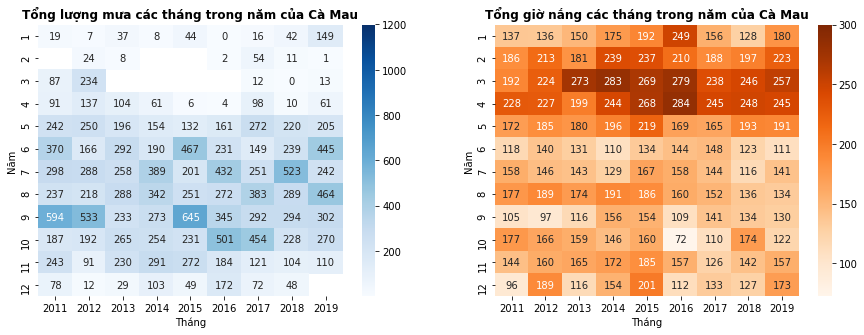

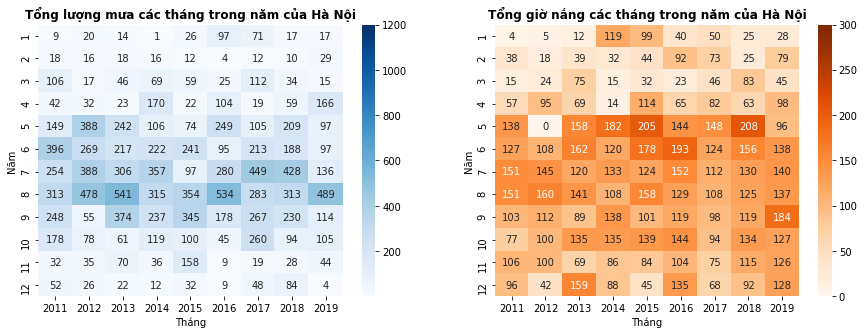

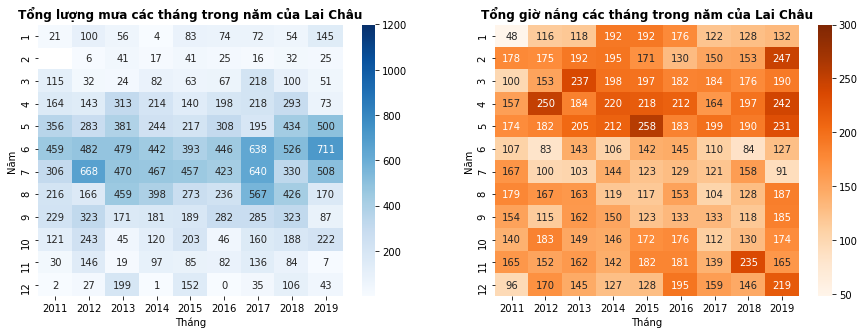

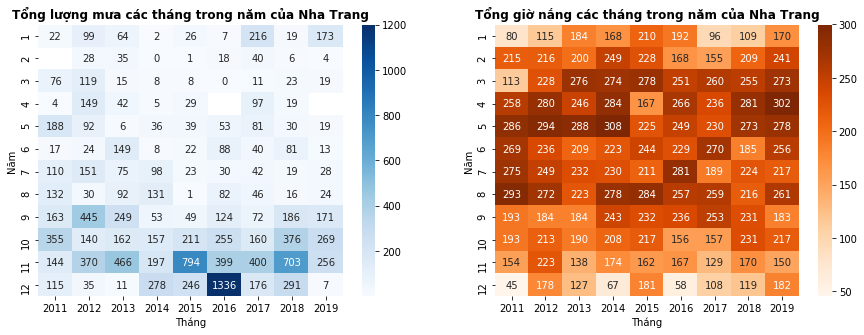

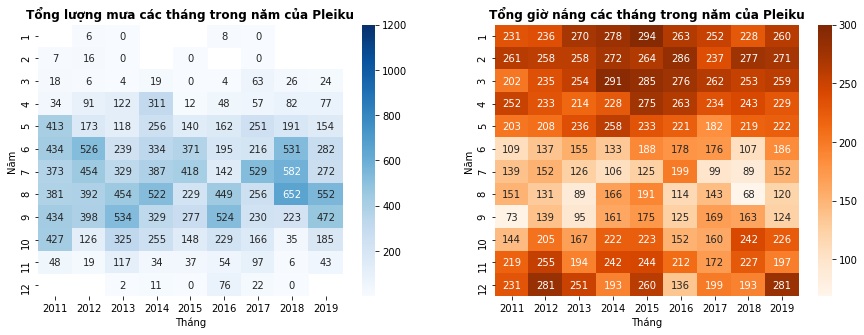

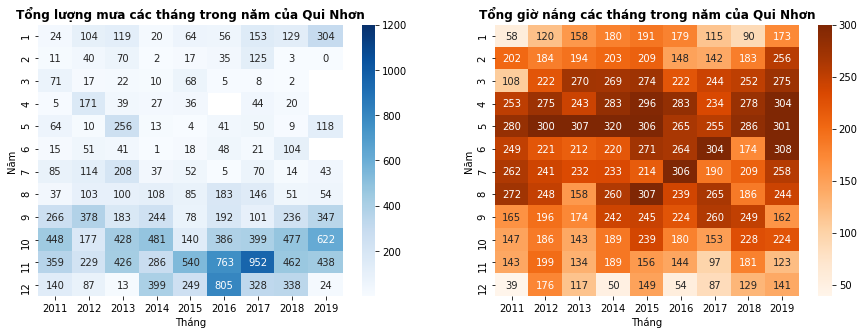

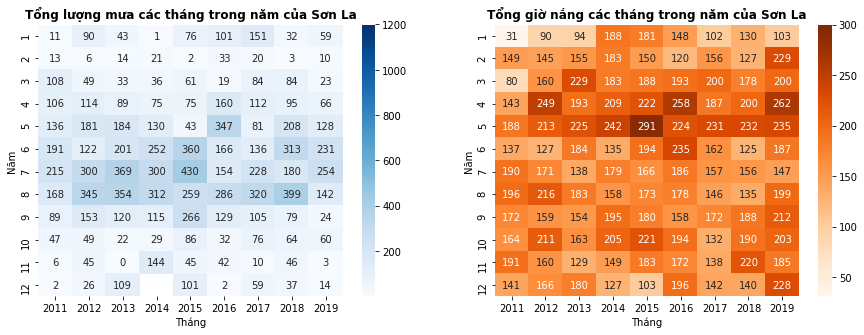

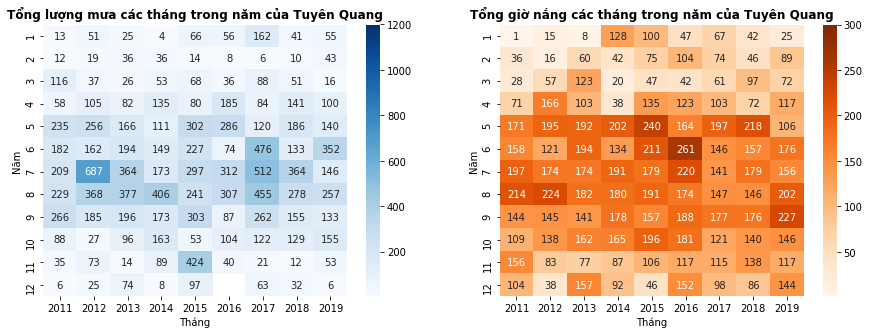

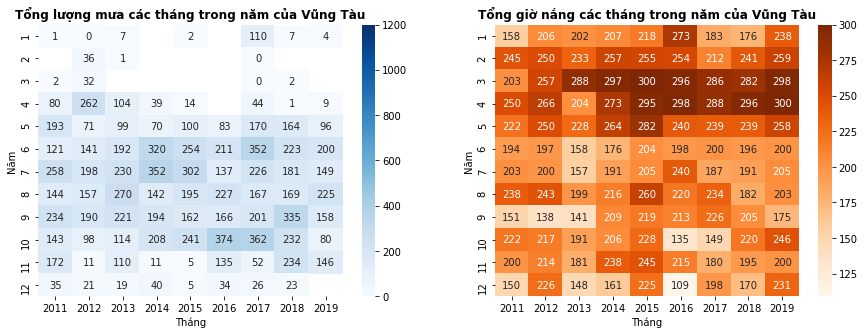

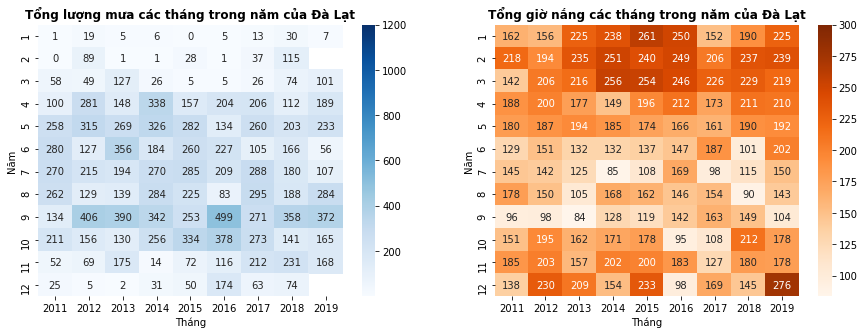

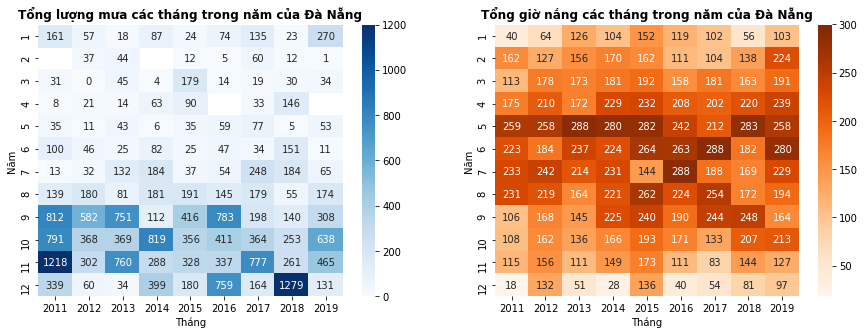

In [201]:
def showHeatmap(df, cmap, vmax, title):
    data_pivot = df[
        (df.Year >= 2011)
        & (df.Name == name)
    ][
        ['Year', 'Month', 'value']
    ].groupby(
        by=['Year', 'Month'], 
        as_index=False
    ).sum()
    sb.heatmap(
        data_pivot.pivot(
            index='Month', 
            columns='Year', 
            values='value'
        ),
        vmax=vmax,
        annot=True,
        fmt='1.0f',
        cmap=cmap,
    )
    plt.xlabel('Tháng')
    plt.ylabel('Năm')
    plt.title(title ,fontweight='bold', fontsize=12) 
    
for name in list_province:
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    showHeatmap(df_rain, 'Blues', 1200, 'Tổng lượng mưa các tháng trong năm của ' + name)
    plt.subplot(1,2,2)
    showHeatmap(df_air, 'Oranges', 300, 'Tổng giờ nắng các tháng trong năm của ' + name)
    plt.show()

In [202]:
columns = df_rain[['Name']].groupby(by=['Name']).count().index.tolist()
for name in columns:
    df_sub_rain = df_rain[df_rain.Name == name]
    df_air_rain = df_air[df_air.Name == name]
    print(name, df_sub_rain.value.corr(df_air_rain.value))

Bãi Cháy 0.38125777517395987
Cà Mau -0.5981336949958617
Huế -0.4511657074298411
Hà Nội 0.4327372648083609
Lai Châu -0.32437082176538606
Nam Định 0.42287346673747495
Nha Trang -0.531510335412792
Pleiku -0.8611985981683267
Qui Nhơn -0.5309244312240542
Sơn La -0.05845960894695201
Tuyên Quang 0.550086168721865
Vinh 0.01832908680647674
Vũng Tàu -0.37747607916224535
Đà Lạt -0.6438311322995609
Đà Nẵng -0.3617107301269024


Vì không thể tìm ra quy luật đúng đắn để thay thế ký tự '..', chỉ chiếm 0.026% dữ liệu, và nhằm để đảm bảo sử đúng đắn của model, nên các row có ký tự '..' sẽ được loại bỏ.

In [211]:
showComponentOfColumn(df_rain)

Name  -  ['Bãi Cháy', 'Cà Mau', 'Huế', 'Hà Nội', 'Lai Châu', 'Nam Định', 'Nha Trang', 'Pleiku', 'Qui Nhơn', 'Sơn La', 'Tuyên Quang', 'Vinh', 'Vũng Tàu', 'Đà Lạt', 'Đà Nẵng']
 
Year  -  [2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
 
Month  -  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
 
value  -  [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.9, 2.0, 2.1, 2.2, 2.4, 2.5, 2.6, 2.7, 2.8, 3.0, 3.1, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.2, 4.4, 4.5, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.2, 6.4, 6.6, 6.7, 6.8, 7.0, 7.1, 7.3, 7.4, 7.5, 7.7, 7.8, 7.9, 8.0, 8.1, 8.3, 8.4, 8.5, 8.6, 8.8, 9.0, 9.1, 9.3, 9.4, 9.6, 9.7, 9.8, 9.9, 10.0, 10.1, 10.2, 10.3, 10.5, 10.7, 10.8, 10.9, 11.0, 11.1, 11.2, 11.3, 11.4, 11.6, 11.7, 11.8, 11.9, 12.0, 12.1, 12.2, 12.3, 12.5, 12.7, 12.8, 12.9, 13.0, 13.1, 13.2, 13.3, 13.4, 13.6, 13.7, 13.8, 13.9, 14.0, 14.1, 14.2, 14.3, 14.5, 14.6, 14.8, 15.0, 15.

In [213]:
df_rain = df_rain[
    (df_rain.value != '..') 
]

In [214]:
df_rain.to_csv('data_preprocessing/gov\Total rainfall Month.csv')